## Model Diagnostics

This notebook replicates the `plot` method found in `hetGP`. By default, `hetGPy` does not explicitly require `matplotlib` (to keep the dependency list as small as possible), but it can be useful to plot model diagnostics, which we do for the `mcycle` data below.


In [1]:
from hetgpy import hetGP
from hetgpy.example_data import mcycle
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
m = mcycle()
X, Z = m['times'], m['accel']
model = hetGP()
model.mle(
    X = X,
    Z = Z,
    covtype="Matern5_2",
    lower = np.array([1.0]),
    upper=np.array([10.0])
)
preds = model.predict(model.X0)
preds['upper'] = norm.ppf(0.95, loc = preds['mean'], scale = np.sqrt(preds['sd2'] + preds['nugs'])).squeeze()
preds['lower'] = norm.ppf(0.05, loc = preds['mean'], scale = np.sqrt(preds['sd2'] + preds['nugs'])).squeeze()


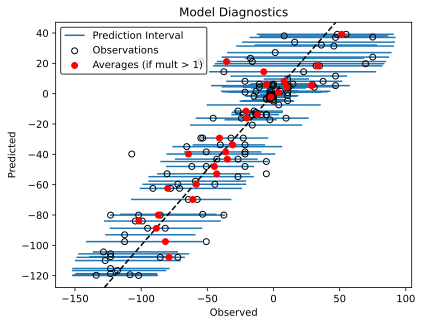

In [2]:
%config InlineBackend.figure_formats = ['svg']
fig, ax = plt.subplots()
idxs = np.repeat(np.arange(len(model.X0)),model.mult)
ax.hlines(
    y=preds['mean'],
    xmin=preds['lower'],
    xmax=preds['upper'],
    label='Prediction Interval',zorder=-10)
ax.scatter(model.Z,
       preds['mean'][idxs],
       facecolors='none',
       edgecolors='black',
       label='Observations',zorder=5)
ax.axline((0, 0), slope=1,color='black',linestyle='dashed')

ax.scatter(model.Z0[(model.mult>1).nonzero()[0]],
           preds['mean'][(model.mult>1).nonzero()[0]],
           label='Averages (if mult > 1)',color='red',zorder=10)
ax.legend(loc='upper left',edgecolor='black')
ax.set_title('Model Diagnostics')
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted');